In [1]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np
##Tried using these to find the features that are most important
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Libraries for the ROC and AUC graph
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

df = pd.read_csv('https://raw.githubusercontent.com/dvdsaz/DataScience/main/input_bcell.csv/input_bcell.csv')

# Checking the data and inspecting what our features are.

In [2]:
df[::]

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.220,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.860,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.280,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.320,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.640,6.867493,0.103846,-0.578846,21.684615,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14382,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,177,191,QVHAEQGLIQYPTAW,0.910,0.175,1.054,0.820,4.894836,0.071719,-0.701083,46.875237,0
14383,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,285,299,SSLAKHGEYAPFARL,0.966,0.216,1.044,1.160,4.894836,0.071719,-0.701083,46.875237,0
14384,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,189,203,TAWQSVGHMMVIFRL,0.821,0.023,1.044,-1.360,4.894836,0.071719,-0.701083,46.875237,0
14385,Q9QZS0,MHSKTAPRFLVFLLLTLLLLLAASPVASKGCVCKGKGQCLCAGTKG...,1479,1493,KRAHGQDLGTLGSCL,1.069,0.239,1.037,2.180,9.553040,0.044338,-0.671001,29.494308,0


In [3]:
## df.shape
df.columns

Index(['parent_protein_id', 'protein_seq', 'start_position', 'end_position',
       'peptide_seq', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker',
       'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability',
       'target'],
      dtype='object')

In [4]:

df.describe(include='all')

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
count,14387,14387,14387.000000,14387.000000,14387,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000
unique,760,757,NaN,NaN,14362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,P10155,MEESVNQMQPLNEKQIANSQDGYVWQVTDMNRLHRFLCFGSEGGTY...,NaN,NaN,ARDVLAVVSK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,560,560,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,297.675818,308.085077,NaN,0.994706,1.059788,1.021188,1.767137,7.067472,0.075727,-0.406097,43.703902,0.271217
std,NaN,NaN,353.741450,353.733297,NaN,0.124772,1.621931,0.053804,1.968985,1.888708,0.025767,0.394618,16.682362,0.444603
min,NaN,NaN,1.000000,6.000000,NaN,0.534000,0.000000,0.838000,-9.029000,3.686096,0.000000,-1.971171,5.448936,0.000000
25%,NaN,NaN,84.000000,95.000000,NaN,0.911000,0.248000,0.986000,0.600000,5.621033,0.060606,-0.606215,31.614529,0.000000
50%,NaN,NaN,191.000000,200.000000,NaN,0.990000,0.556000,1.020000,1.793000,6.499573,0.074534,-0.330540,42.287268,0.000000
75%,NaN,NaN,382.000000,393.000000,NaN,1.074000,1.209000,1.055000,3.009500,8.676575,0.091312,-0.189591,49.101172,1.000000


# Checking to see exactly how many parent protein ids there are.

### Our main concern is that if we one hot encode  the protien ids we will end up with a lot of features so we need to see exactly how many unique ids there are.

In [5]:
df['parent_protein_id'].value_counts()

P10155    560
P69996    517
P05164    506
P13423    445
P15917    389
         ... 
P21453      1
A4IDB2      1
G1UB30      1
P10415      1
Q3YT87      1
Name: parent_protein_id, Length: 760, dtype: int64

In [6]:
features = list(df.columns)

In [7]:
print(features)
xfeatures = features[:len(features)-1]
print(xfeatures)

['parent_protein_id', 'protein_seq', 'start_position', 'end_position', 'peptide_seq', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker', 'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability', 'target']
['parent_protein_id', 'protein_seq', 'start_position', 'end_position', 'peptide_seq', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker', 'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability']


# Decided to drop the columns 'parent_protein_id' , 'protein_seq', 'peptide_seq'

#### As stated before we had to many unique data values to one hot encode so we dropped all the qualitative data values and kept the quantitative values that way we can normalize the numeric values

In [8]:
from sklearn import preprocessing
x = df[xfeatures]
x=x.drop(columns=['parent_protein_id','protein_seq','peptide_seq'])
scaler = preprocessing.MinMaxScaler()
names = x.columns

x_norm = scaler.fit_transform(x)
y = df['target']
scaled_x = pd.DataFrame(x_norm,columns=x.columns)
scaled_x.head()



,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,0.051982,0.051623,0.476285,0.025856,0.431655,0.619814,0.248550,0.566651,0.564298,0.264627
1,0.081222,0.080844,0.233202,0.006584,0.865707,0.284809,0.295412,0.359258,0.597317,0.148556
2,0.046784,0.046429,0.314229,0.126044,0.292566,0.733319,0.530951,0.503623,0.880225,0.170325
3,0.049058,0.048701,0.865613,0.093714,0.235012,0.845722,0.064573,0.245679,0.447703,0.192377
4,0.027290,0.026948,0.671937,0.070175,0.237410,0.753154,0.372240,0.569787,0.429961,0.123374


# We didn't know what the distribution of the data features looked like, so this was optimal for us to use normalization, that way there wouldn't be skews in distribution that would affect  training our models

In [9]:
x_norm[::]

array([[0.05198181, 0.05162338, 0.47628458, ..., 0.5666512 , 0.56429767,
        0.26462739],
       [0.08122157, 0.08084416, 0.23320158, ..., 0.35925752, 0.59731663,
        0.14855557],
       [0.04678363, 0.04642857, 0.31422925, ..., 0.50362319, 0.88022531,
        0.1703251 ],
       ...,
       [0.06107862, 0.06396104, 0.28359684, ..., 0.3935083 , 0.39221332,
        0.31479495],
       [0.48018194, 0.48279221, 0.52865613, ..., 0.2432752 , 0.40150286,
        0.18271874],
       [0.53476283, 0.53733766, 0.4229249 , ..., 0.2432752 , 0.40150286,
        0.18271874]])

# We were initially running into problems with training and testing times, so we decided to use ExtraTrees Classifier to help show us which features were most important.

## We were hoping to see if we could drop more features from our data to speed things up or improve accuracies.

[0.10425488 0.1055372  0.08578687 0.08422139 0.08068139 0.08530812
 0.12198865 0.11771683 0.10848902 0.10601564]


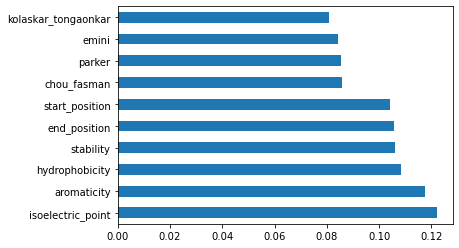

In [10]:
## using a different library because SelectKBest won't allow values to be negative

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

##bestfeatures = SelectKBest(score_func=chi2, k=10)
##fit = bestfeatures.fit(x,y)
##dfscores = pd.DataFrame(fit.scores_)
##dfcolumns = pd.DataFrame(x.columns)
##featureScores = pd.concat([dfcolumns,dfscores], axis=1)
##featureScores.columns = ['Specs','Scores']
#print(featureScores.nlargest(10,'Score'))

model = ExtraTreesClassifier(random_state=0)
model.fit(x_norm,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_,index=x.columns)

feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# It turned out that all the features were around the same importance we experimented with dropping the last four to see if it affected anything.

# Ultimately nothing really changed so we just ended keeping the features as is

# The next step after this was to actually inspect the feature distributions and see if any were being skewed

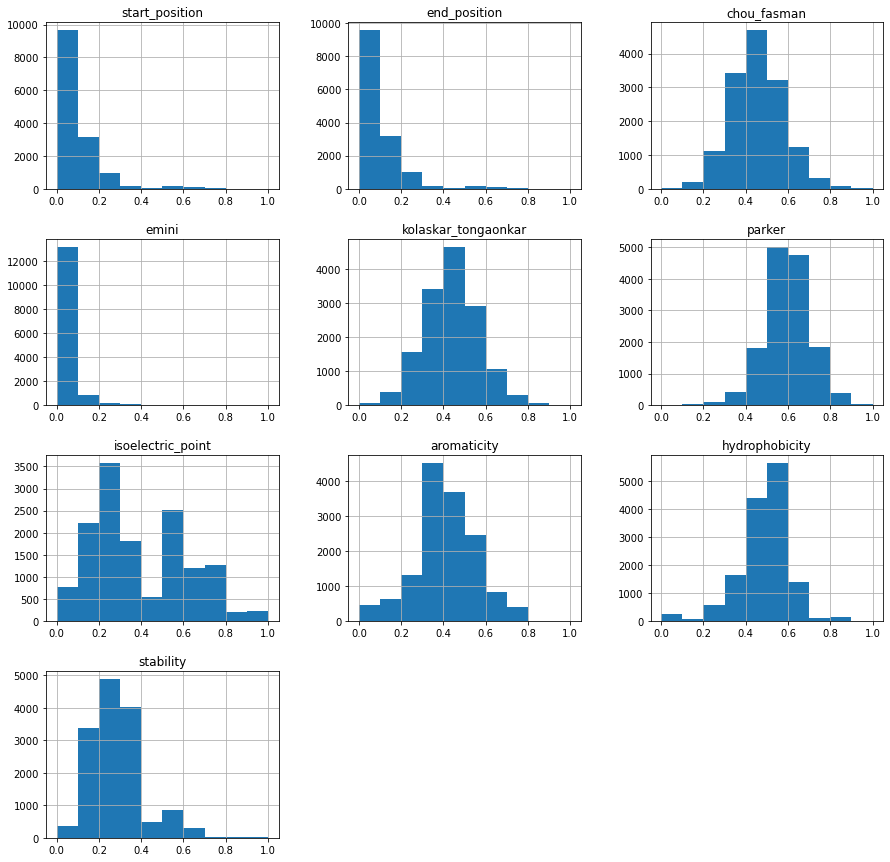

In [11]:
scaled_x.hist(figsize=(15,15))
plt.show()

# From inspections of the features it showed us that there are some features that are skewed so we would run log transformation on them to see if will give a bell distribution.



In [12]:
skews = ['start_position','end_position','emini']
for x in skews:
    scaled_x[x] = np.log(scaled_x[x]+1)

# In the end it didn't change anything so we just stuck to the data we had because we were at a loss on what else to do to help change the data.

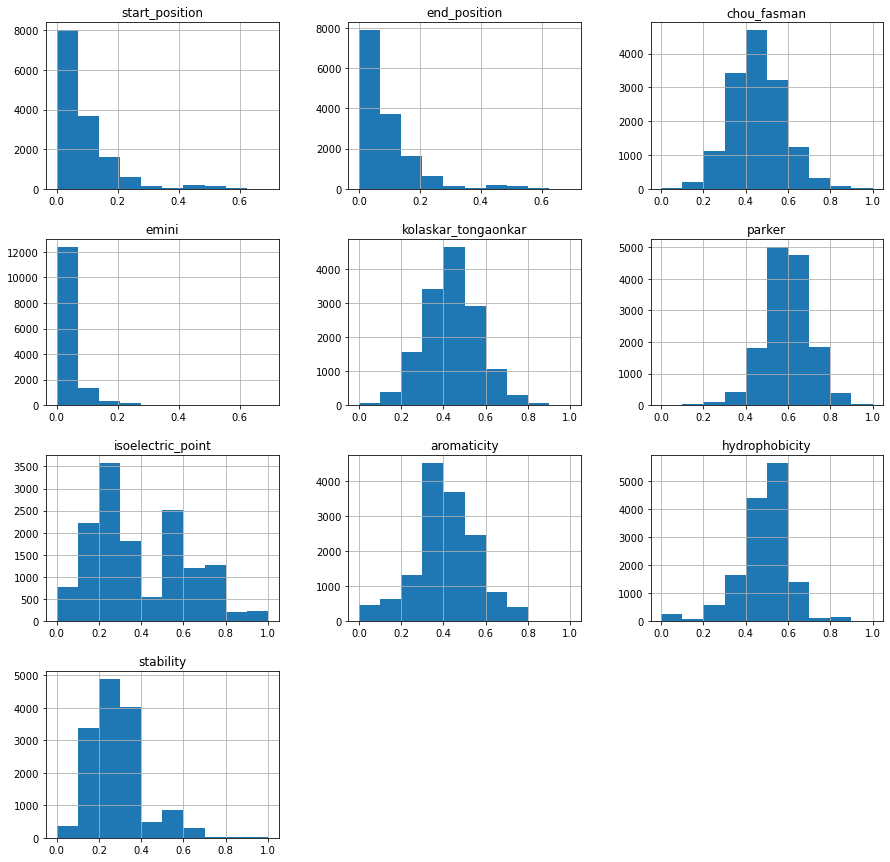

In [13]:
scaled_x.hist(figsize=(15,15))
plt.show()

# Spliting the data

In [14]:
X_train, X_test,Y_train, Y_test = train_test_split(x_norm, y, test_size=0.3, random_state=6)

In [15]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_predict = (knn.predict(X_test))
y_pred    = Y_predict
y_actual  = Y_test
score = accuracy_score(y_actual, y_pred)
print(score)

0.798239518183924


# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

# In the following line, "my_LinReg" is instantiated as an "object" of LinearRegression "class"
my_LinReg = LinearRegression()

# Fitting the model to the training dataset
my_LinReg.fit(X_train, Y_train)

# Printing Theta0 using attribute "intercept_":
print(my_LinReg.intercept_)

# Printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(my_LinReg.coef_)

0.11536019865757674
[-18.03970857  17.57284006   0.38172009   0.56876441  -0.13533403
  -0.26310295  -0.28219627   0.03633797   0.41108731   0.29516608]


In [24]:
predict_price = my_LinReg.predict(X_test)

print(predict_price)

score_linreg = my_LinReg.score(X_test,Y_test)
print("Linear Regression accuracy:",score_linreg*100)


# NOT SURE IF NEEDED
# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(Y_test, predict_price)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

#using a cross validation with 10 fold to confirm the accuracy of the RMSE
my_linreg = LinearRegression()
mse_list = cross_val_score(my_linreg,x_norm,y,cv=10,scoring='neg_mean_squared_error')
print("\nUsing Cross Validation with 10 shuffles to confirm RMSE result")
print("-----------------------------------------------------------------")
print(mse_list)

pos_mse = -mse_list
rmse_list = np.sqrt(pos_mse)

print("\nThe Average RMSE Result from 10-fold Cross Validation ")
print("-----------------------------------------------------------------")
print("RMSE Average: " + str(rmse_list.mean()))

[0.38518857 0.22813797 0.27104623 ... 0.29154873 0.21665094 0.35909595]
Linear Regression accuracy: 5.730285963049264
0.4347505524884967

Using Cross Validation with 10 shuffles to confirm RMSE result
-----------------------------------------------------------------
[-0.23932686 -0.16287488 -0.14178921 -0.15455129 -0.18064301 -0.28053629
 -0.31885209 -0.15868735 -0.17076618 -0.21663866]

The Average RMSE Result from 10-fold Cross Validation 
-----------------------------------------------------------------
RMSE Average: 0.44588541265774556


# Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor

# "my_randforest" is instantiated as an "object" of RandomForestRegressor "class". 
my_randforest = RandomForestRegressor()

# We can use the method "fit" of the objects "my_randforest" along with training dataset and labels to train the model.
my_randforest.fit(X_train,Y_train)

# Testing on the testing set:
y_predict_rfr = my_randforest.predict(X_test)

print(y_predict_rfr)

# Calculating "Mean Square Error" (MSE):
mse_rfr= metrics.mean_squared_error(Y_test,y_predict_rfr)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse_rfr = np.sqrt(mse_rfr)

print("RMSE Average: ",rmse_rfr)

[0.73 0.31 0.04 ... 0.14 0.57 0.18]
RMSE Average:  0.3176745114185327


In [19]:

# Applying 10-fold cross validation with "Random Forest Regressor":
my_randforest = RandomForestRegressor()
mse_list_rfr = cross_val_score(my_randforest, x_norm, y, cv=10, scoring='neg_mean_squared_error')
#print(mse_list_rfr)

# in order to calculate root mean square error (rmse), we have to make them positive!
mse_list_positive_rfr = -mse_list_rfr

# using numpy sqrt function to calculate rmse:
rmse_list_rfr = np.sqrt(mse_list_positive_rfr )
#print(rmse_list_rfr)

# calculate the average RMSE as final result of cross validation:
print("RMSE Average: ",rmse_list_rfr.mean())

RMSE Average:  0.5651315763891824


# Decision tree classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
my_DecisionTree = DecisionTreeClassifier(random_state=4)
my_DecisionTree.fit(X_train,Y_train)
y_predict_dt = my_DecisionTree.predict(X_test)
print(y_predict_dt)
dt_score = accuracy_score(Y_test,y_predict_dt)
print("Deicision Tree Accuracy: ", dt_score)




[1 0 0 ... 0 1 0]
Deicision Tree Accuracy:  0.8086634236738476


In [21]:
y_predict_dt_prob = my_DecisionTree.predict_proba(X_test)
dt_fpr, dt_tpr, dt_thresholds = roc_curve(Y_test,y_predict_dt_prob[:,1],pos_label=1)
dt_auc = auc(dt_fpr,dt_tpr)

# AdaBoost Classifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier
my_ada = AdaBoostClassifier(n_estimators = 29, random_state=4)
my_ada.fit(X_train,Y_train)
y_predict_ada = my_ada.predict(X_test)
ada_score = accuracy_score(Y_test,y_predict_ada)
print("AdaBoost Classifier Accuracy: ", ada_score)

AdaBoost Classifier Accuracy:  0.7523743340282604


In [23]:
y_predict_ada_prob =my_ada.predict_proba(X_test)
ada_fpr, ada_tpr, ada_thresholds = roc_curve(Y_test,y_predict_ada_prob[:,1],pos_label=1)
ada_auc = auc(ada_fpr,ada_tpr)
print("AUC:" + str(ada_auc))

AUC:0.7883824756554286


# ROC Curve graph plot

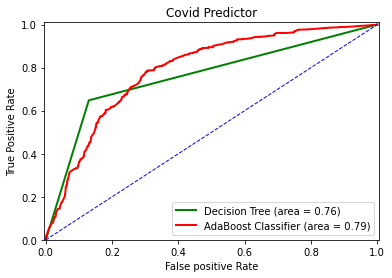

In [24]:
%matplotlib inline

plt.figure()

#Roc Curve for decision tree classifier
plt.plot(dt_fpr,dt_tpr,color='green',lw=2,label='Decision Tree (area = %0.2f)' % dt_auc)

#Roc Curver for adaboost Classifier
plt.plot(ada_fpr,ada_tpr,color='red',lw=2,label='AdaBoost Classifier (area = %0.2f)' % ada_auc)

#Roc Curves for all other classifiers ...



#Random Guess Line 
plt.plot([0,1],[0,1], color='blue',lw=1,linestyle='--')

#defining the range of X-axis and Y-axis
plt.xlim([-0.005,1.005])
plt.ylim([0.0,1.01])


#Labels, title, legend
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Covid Predictor')
plt.legend(loc="lower right")

plt.show()